In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [ ]:
# Load the dataset
df = pd.read_csv("3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69 (1).csv")

# Data preprocessing (from clean.ipynb)
df.columns = df.columns.str.lower().str.strip()
df['last_update'] = pd.to_datetime(df['last_update'], dayfirst=True, errors='coerce')
df.drop_duplicates(inplace=True)
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]

# Feature engineering
df['year'] = df['last_update'].dt.year
df['month'] = df['last_update'].dt.month
df['day'] = df['last_update'].dt.day
df['hour'] = df['last_update'].dt.hour
df['month_name'] = df['last_update'].dt.month_name()

# Create pollution level categories
df['pollution_level'] = pd.cut(
    df['pollutant_avg'],
    bins=[0, 50, 100, 200, 300, 500],
    labels=['Good', 'Moderate', 'Poor', 'Very Poor', 'Severe']
)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (2384, 17)

Columns: ['country', 'state', 'city', 'station', 'last_update', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg', 'year', 'month', 'day', 'hour', 'month_name', 'pollution_level']


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,year,month,day,hour,month_name,pollution_level
0,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",2025-12-18 14:00:00,26.108870,91.589544,NO2,12.0,20.0,15.0,2025,12,18,14,December,Good
1,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",2025-12-18 14:00:00,26.108870,91.589544,SO2,NaN,NaN,NaN,2025,12,18,14,December,NaN
2,India,Assam,Guwahati,"Pan Bazaar, Guwahati - PCBA",2025-12-18 14:00:00,26.187500,91.744194,PM2.5,30.0,258.0,110.0,2025,12,18,14,December,Poor
3,India,Assam,Guwahati,"Pan Bazaar, Guwahati - PCBA",2025-12-18 14:00:00,26.187500,91.744194,CO,11.0,74.0,32.0,2025,12,18,14,December,Good
4,India,Assam,Guwahati,"Railway Colony, Guwahati - PCBA",2025-12-18 14:00:00,26.181742,91.780630,PM10,47.0,290.0,143.0,2025,12,18,14,December,Poor


In [ ]:
# Basic statistics
print("Dataset Information:")
print(df.info())
print("\n" + "="*50 + "\n")
print("Numerical Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")
print("Missing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          2384 non-null   object        
 1   state            2384 non-null   object        
 2   city             2384 non-null   object        
 3   station          2384 non-null   object        
 4   last_update      2384 non-null   datetime64[ns]
 5   latitude         2384 non-null   float64       
 6   longitude        2384 non-null   float64       
 7   pollutant_id     2384 non-null   object        
 8   pollutant_min    2204 non-null   float64       
 9   pollutant_max    2204 non-null   float64       
 10  pollutant_avg    2204 non-null   float64       
 11  year             2384 non-null   int32         
 12  month            2384 non-null   int32         
 13  day              2384 non-null   int32         
 14  hour             23

---
## UNIVARIATE ANALYSIS


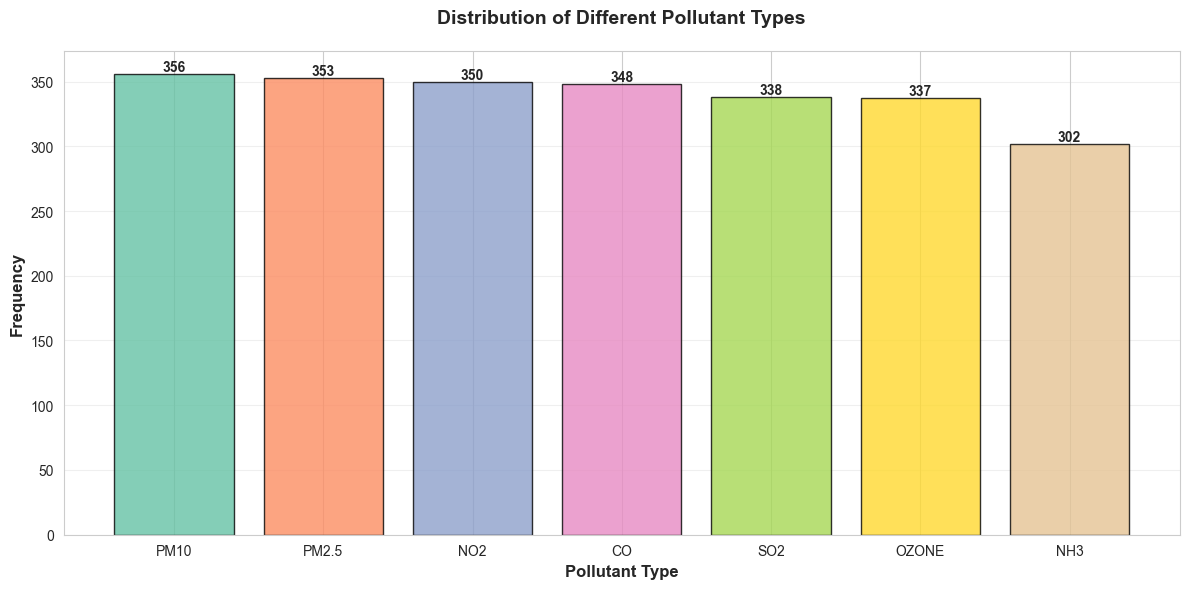


Pollutant Distribution:
pollutant_id
PM10     356
PM2.5    353
NO2      350
CO       348
SO2      338
OZONE    337
NH3      302
Name: count, dtype: int64


In [ ]:
# Visualization 1: Distribution of Pollutant Types
fig, ax = plt.subplots(figsize=(12, 6))
pollutant_counts = df['pollutant_id'].value_counts()
colors = sns.color_palette('Set2', len(pollutant_counts))

bars = ax.bar(pollutant_counts.index, pollutant_counts.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Pollutant Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Different Pollutant Types', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPollutant Distribution:")
print(pollutant_counts)

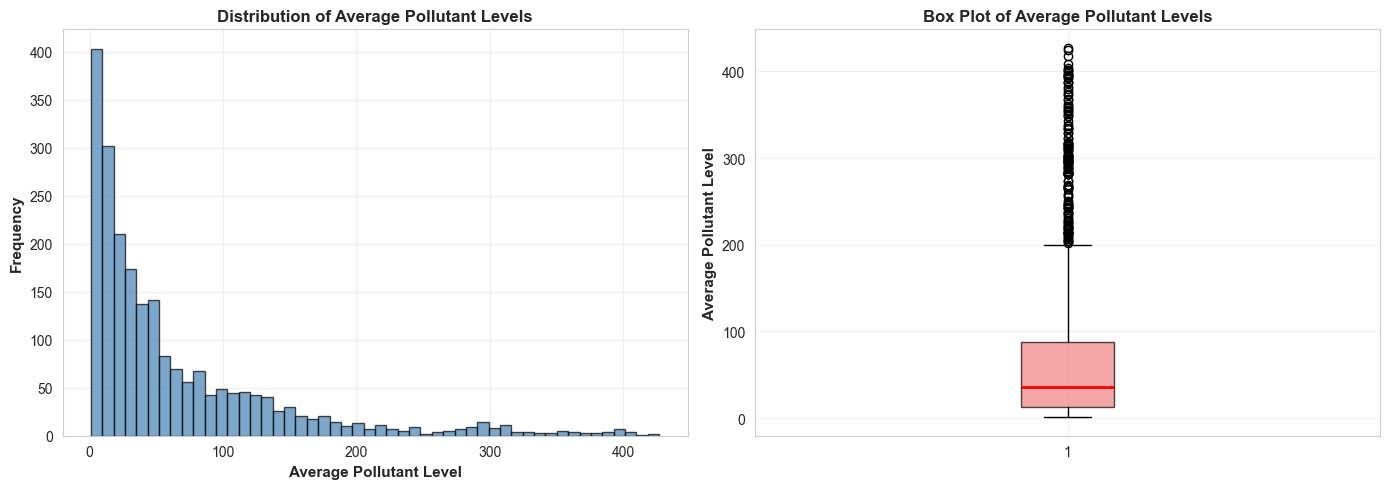

Mean: 65.88
Median: 36.00
Std Dev: 78.75


In [ ]:
# Visualization 2: Distribution of Average Pollutant Levels (Histogram with KDE)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
df_clean = df.dropna(subset=['pollutant_avg'])
axes[0].hist(df_clean['pollutant_avg'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Average Pollutant Level', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Average Pollutant Levels', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df_clean['pollutant_avg'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Average Pollutant Level', fontsize=11, fontweight='bold')
axes[1].set_title('Box Plot of Average Pollutant Levels', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean: {df_clean['pollutant_avg'].mean():.2f}")
print(f"Median: {df_clean['pollutant_avg'].median():.2f}")
print(f"Std Dev: {df_clean['pollutant_avg'].std():.2f}")

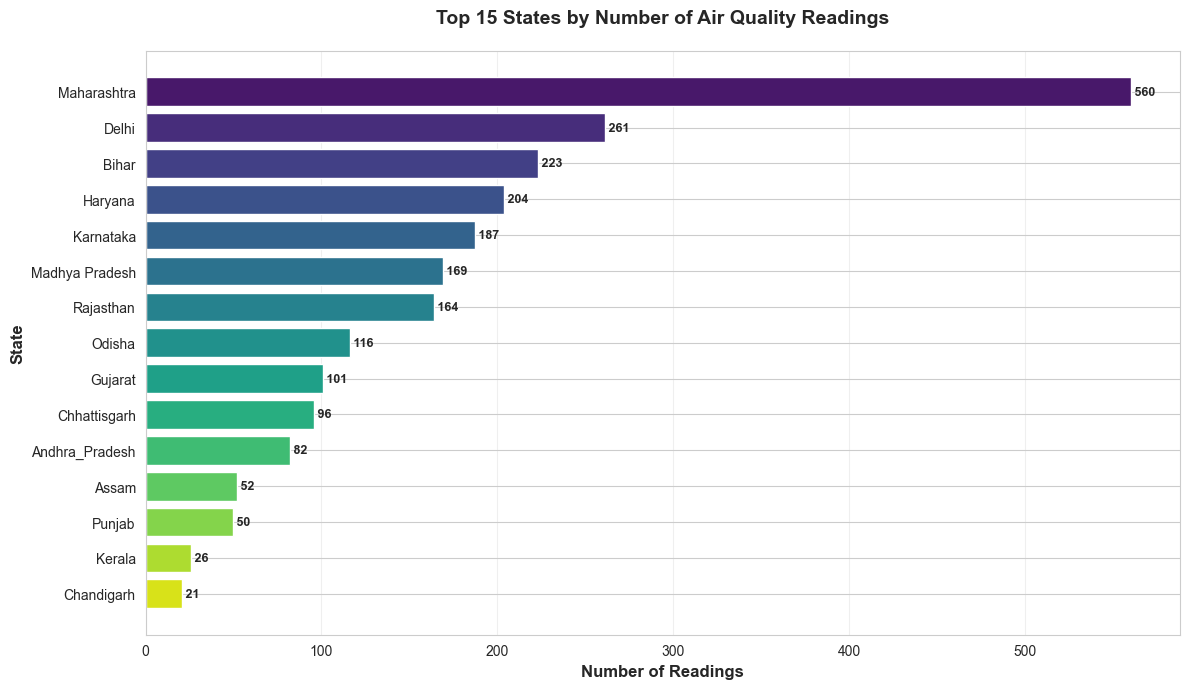

In [ ]:
# Visualization 3: Top 15 States by Number of Monitoring Stations
state_counts = df['state'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(state_counts.index, state_counts.values, color=sns.color_palette('viridis', len(state_counts)))
ax.set_xlabel('Number of Readings', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
ax.set_title('Top 15 States by Number of Air Quality Readings', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, state_counts.values)):
    ax.text(value, i, f' {int(value):,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

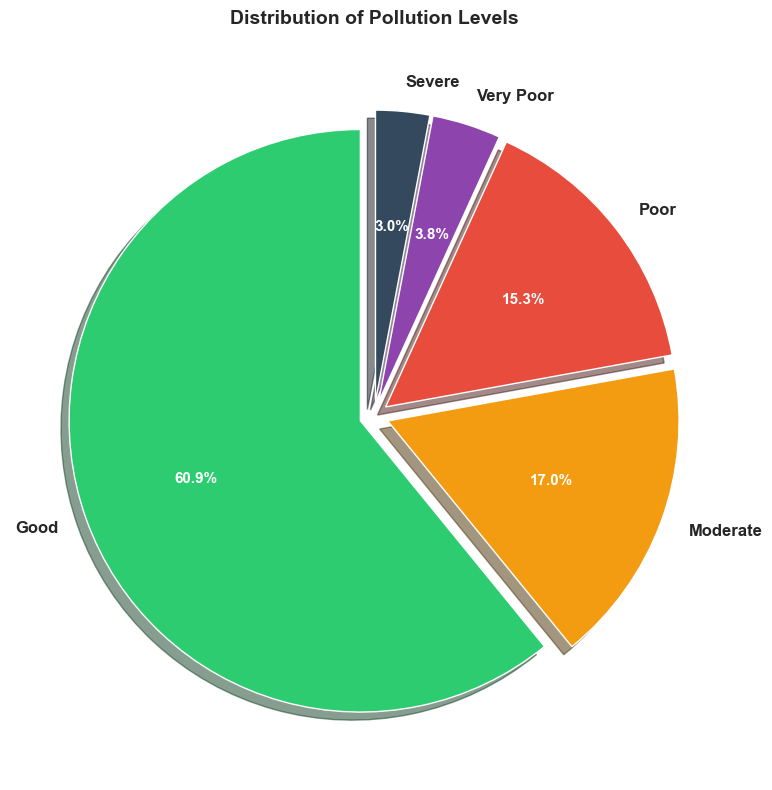


Pollution Level Distribution:
pollution_level
Good         1342
Moderate      374
Poor          338
Very Poor      84
Severe         66
Name: count, dtype: int64


In [ ]:
# Visualization 4: Pollution Level Categories (Pie Chart)
pollution_level_counts = df['pollution_level'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
colors_pie = ['#2ecc71', '#f39c12', '#e74c3c', '#8e44ad', '#34495e']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(pollution_level_counts.values,
                                    labels=pollution_level_counts.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors_pie,
                                    explode=explode,
                                    shadow=True)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

ax.set_title('Distribution of Pollution Levels', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nPollution Level Distribution:")
print(pollution_level_counts)

---
## BIVARIATE ANALYSIS
Examining relationships between two variables

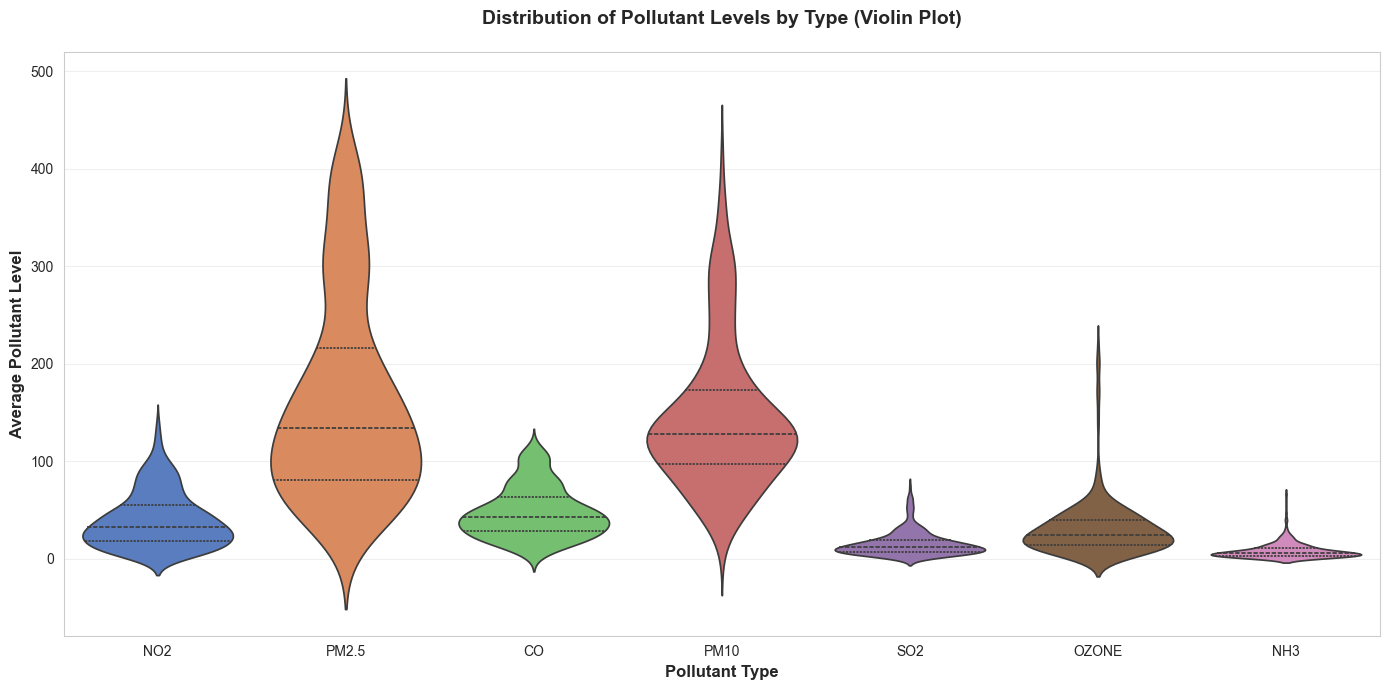

In [ ]:
# Visualization 5: Average Pollutant Levels by Pollutant Type (Violin Plot)
fig, ax = plt.subplots(figsize=(14, 7))

df_for_violin = df.dropna(subset=['pollutant_avg'])
sns.violinplot(data=df_for_violin, x='pollutant_id', y='pollutant_avg',
               palette='muted', ax=ax, inner='quartile')

ax.set_xlabel('Pollutant Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Pollutant Level', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Pollutant Levels by Type (Violin Plot)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

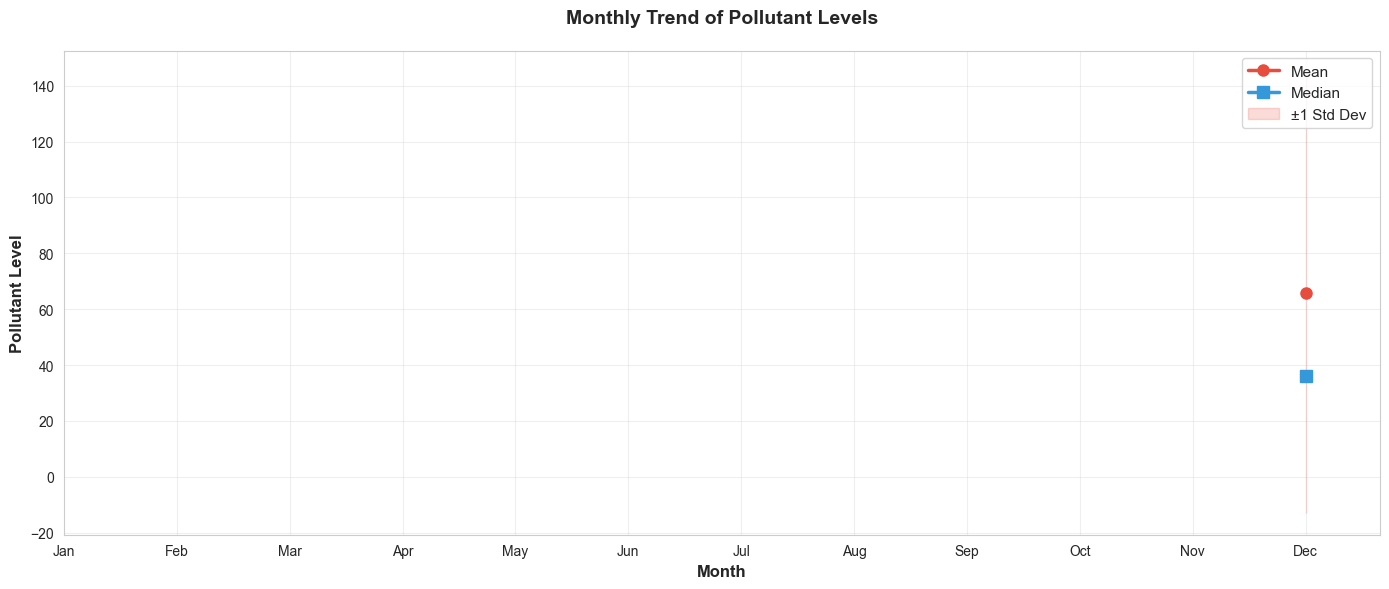

In [ ]:
# Visualization 6: Pollutant Levels by Month (Time Series Pattern)
monthly_avg = df.groupby('month')['pollutant_avg'].agg(['mean', 'median', 'std']).reset_index()

fig, ax = plt.subplots(figsize=(14, 6))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.plot(monthly_avg['month'], monthly_avg['mean'], marker='o', linewidth=2.5,
        label='Mean', color='#e74c3c', markersize=8)
ax.plot(monthly_avg['month'], monthly_avg['median'], marker='s', linewidth=2.5,
        label='Median', color='#3498db', markersize=8)
ax.fill_between(monthly_avg['month'],
                monthly_avg['mean'] - monthly_avg['std'],
                monthly_avg['mean'] + monthly_avg['std'],
                alpha=0.2, color='#e74c3c', label='±1 Std Dev')

ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Pollutant Level', fontsize=12, fontweight='bold')
ax.set_title('Monthly Trend of Pollutant Levels', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.legend(fontsize=11, loc='upper right')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

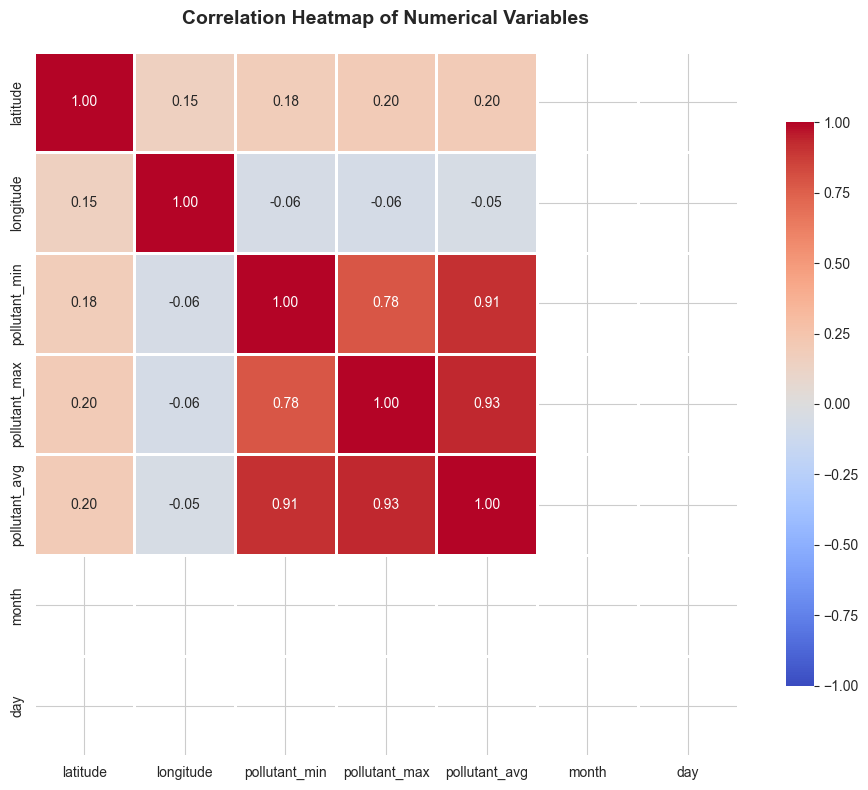

In [ ]:
# Visualization 7: Correlation Heatmap (Numerical Variables)
numerical_cols = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg', 'month', 'day']
correlation_matrix = df[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

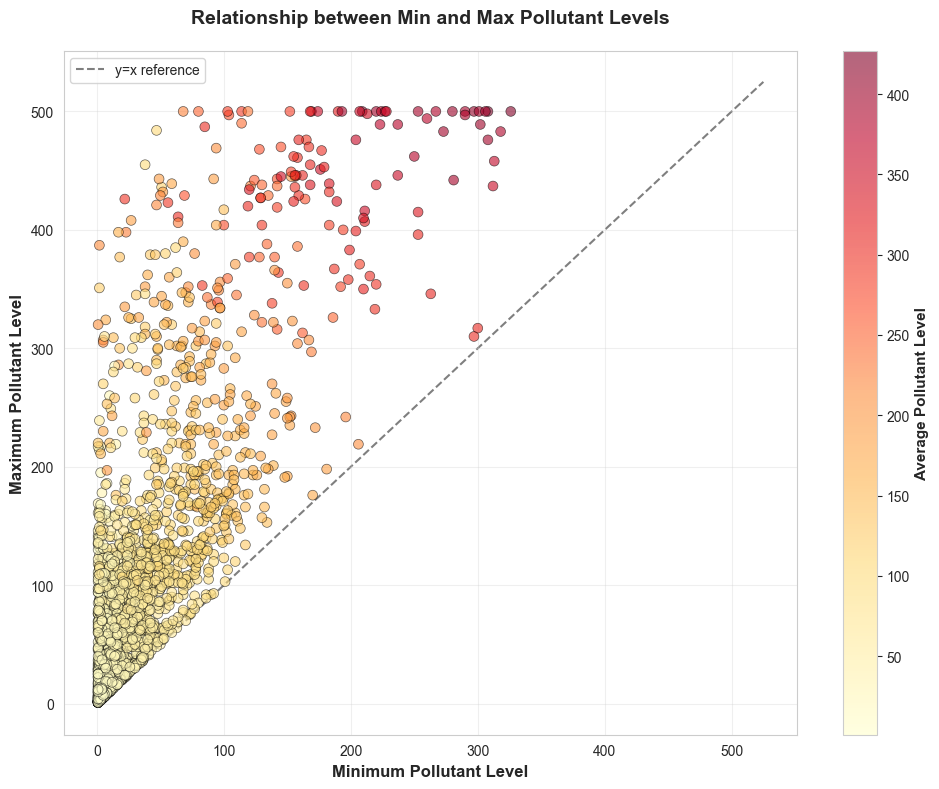

In [ ]:
# Visualization 8: Scatter Plot - Min vs Max Pollutant Levels
df_scatter = df.dropna(subset=['pollutant_min', 'pollutant_max'])

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df_scatter['pollutant_min'], df_scatter['pollutant_max'],
                     c=df_scatter['pollutant_avg'], cmap='YlOrRd',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax.set_xlabel('Minimum Pollutant Level', fontsize=12, fontweight='bold')
ax.set_ylabel('Maximum Pollutant Level', fontsize=12, fontweight='bold')
ax.set_title('Relationship between Min and Max Pollutant Levels', fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.3)

# Add diagonal reference line
lims = [0, max(ax.get_xlim()[1], ax.get_ylim()[1])]
ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0, label='y=x reference')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Pollutant Level', fontsize=11, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

---
## MULTIVARIATE ANALYSIS
Examining complex relationships among multiple variables

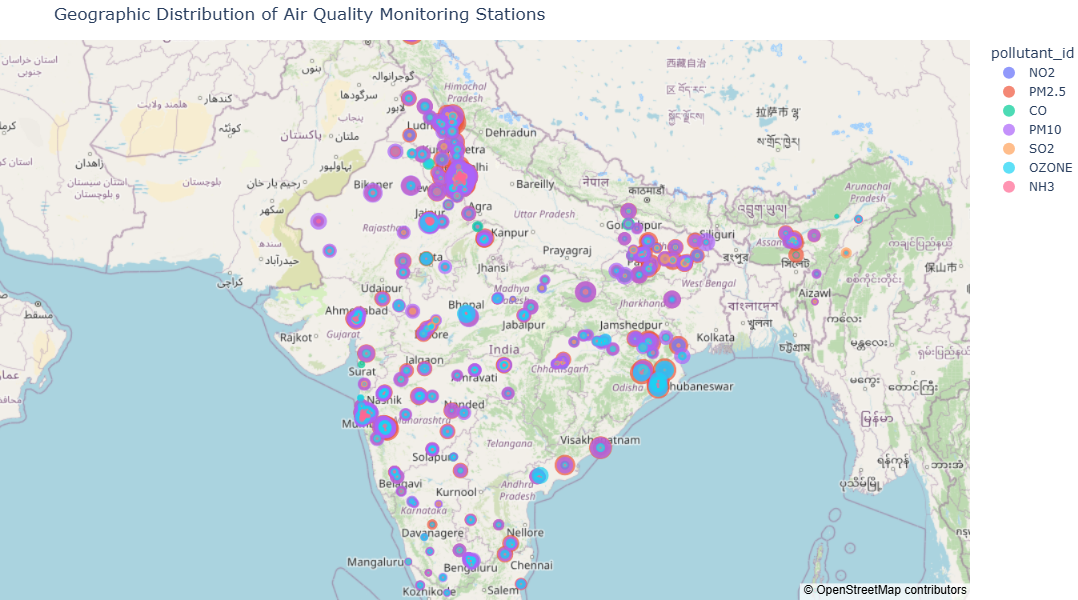

In [ ]:
# Visualization 9: Interactive Geographic Distribution of Pollutants (Plotly)
df_geo = df.dropna(subset=['pollutant_avg', 'latitude', 'longitude'])

# Sample data for better performance (use all if dataset is small)
if len(df_geo) > 5000:
    df_geo_sample = df_geo.sample(5000, random_state=42)
else:
    df_geo_sample = df_geo

fig = px.scatter_mapbox(df_geo_sample,
                        lat='latitude',
                        lon='longitude',
                        color='pollutant_id',
                        size='pollutant_avg',
                        hover_data=['city', 'state', 'station', 'pollutant_avg'],
                        title='Geographic Distribution of Air Quality Monitoring Stations',
                        zoom=4,
                        height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

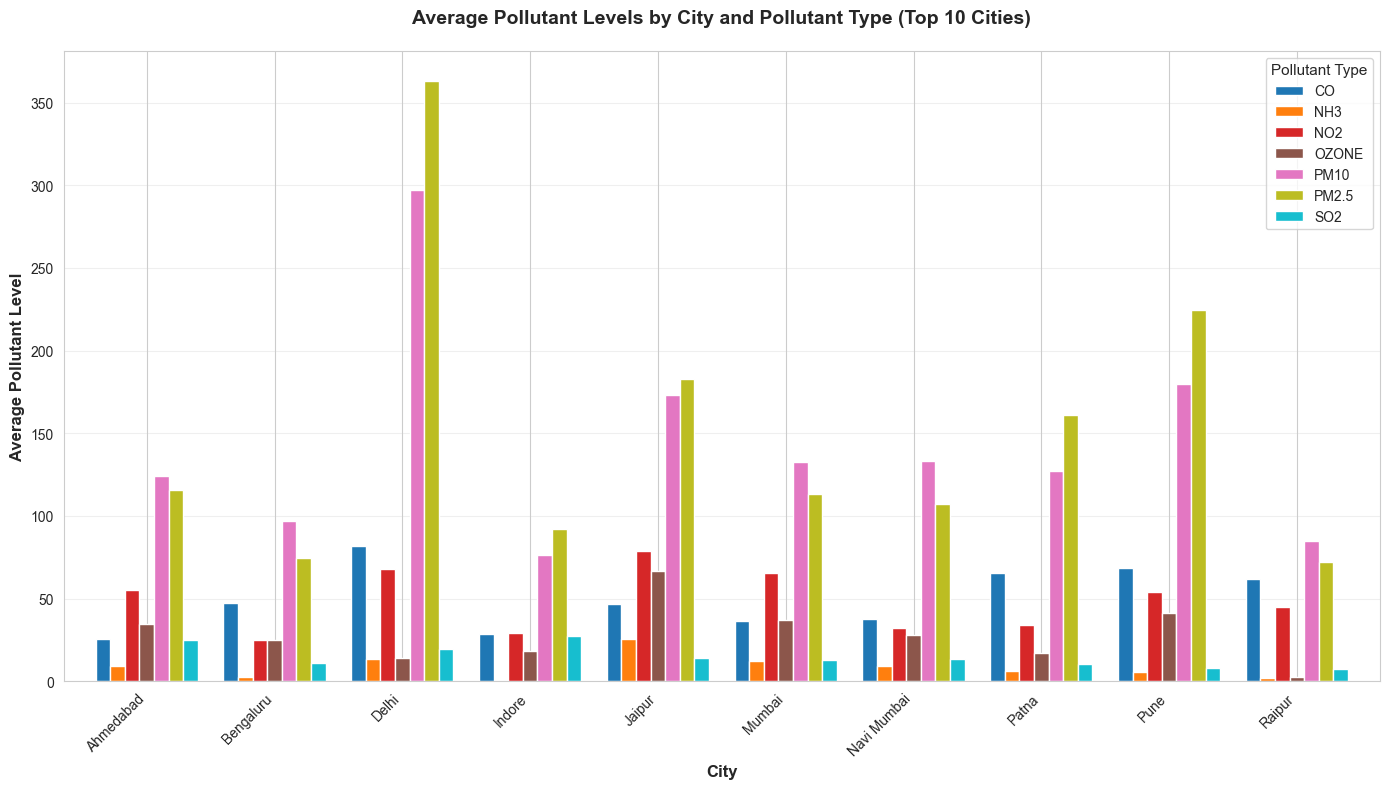

In [ ]:
# Visualization 10: Grouped Bar Chart - Top 10 Cities by Pollutant Type
top_cities = df['city'].value_counts().head(10).index
df_top_cities = df[df['city'].isin(top_cities)]

city_pollutant = df_top_cities.groupby(['city', 'pollutant_id'])['pollutant_avg'].mean().reset_index()
city_pollutant_pivot = city_pollutant.pivot(index='city', columns='pollutant_id', values='pollutant_avg')

fig, ax = plt.subplots(figsize=(14, 8))
city_pollutant_pivot.plot(kind='bar', ax=ax, width=0.8, colormap='tab10')

ax.set_xlabel('City', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Pollutant Level', fontsize=12, fontweight='bold')
ax.set_title('Average Pollutant Levels by City and Pollutant Type (Top 10 Cities)',
             fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Pollutant Type', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

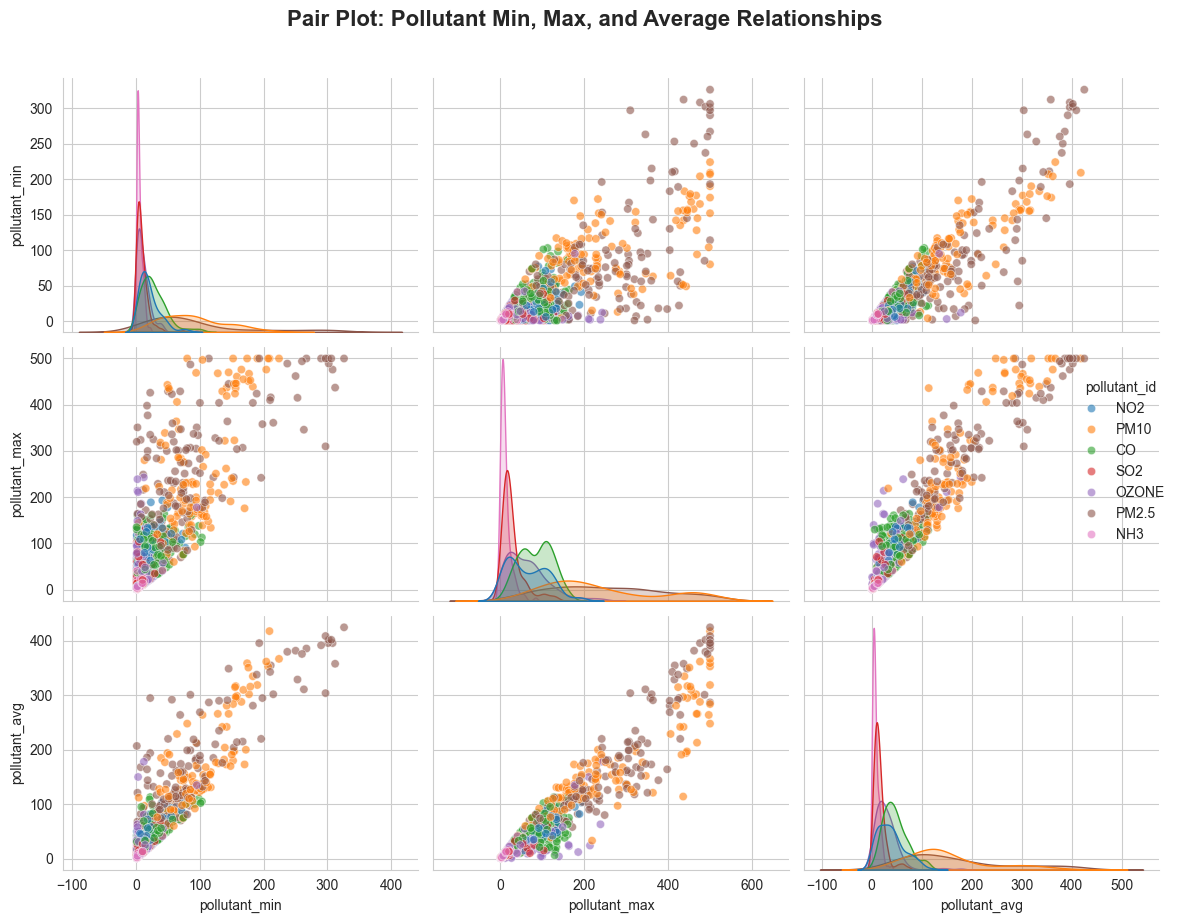

In [ ]:
# Visualization 11: Pair Plot for Key Numerical Variables (Seaborn)
df_pairplot = df[['pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_id']].dropna()

# Sample for performance if dataset is large
if len(df_pairplot) > 1000:
    df_pairplot = df_pairplot.sample(1000, random_state=42)

g = sns.pairplot(df_pairplot, hue='pollutant_id', diag_kind='kde',
                 plot_kws={'alpha': 0.6}, height=3, aspect=1.2)
g.fig.suptitle('Pair Plot: Pollutant Min, Max, and Average Relationships',
               y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

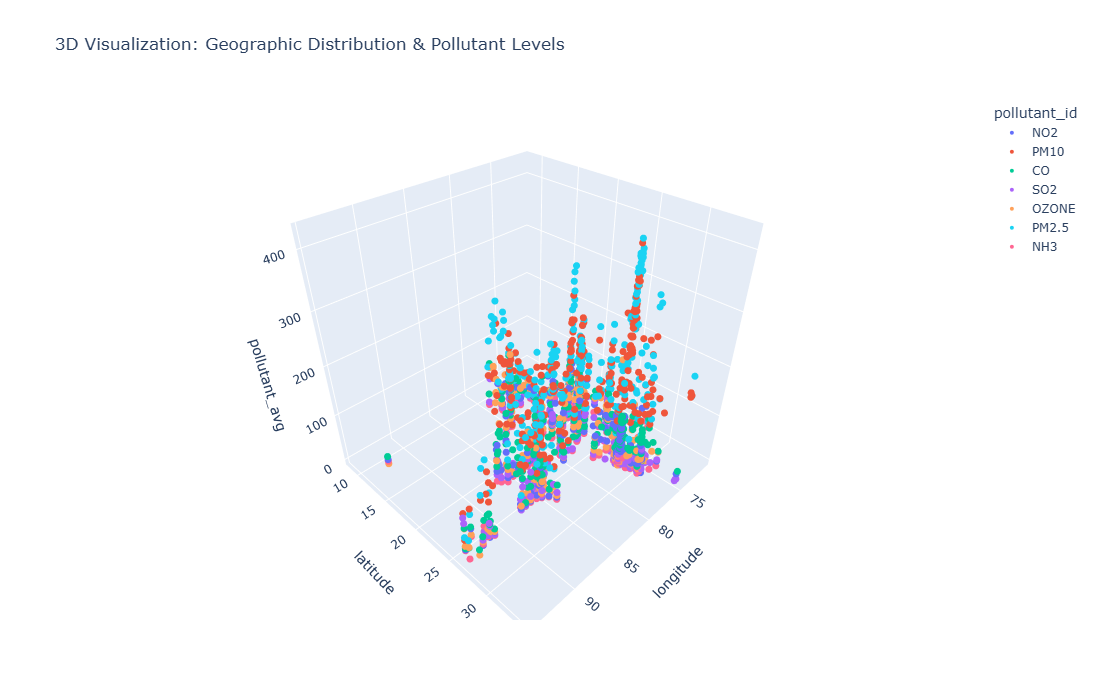

In [ ]:
# Visualization 12: 3D Scatter Plot - Pollutant Levels across Geographic Coordinates (Plotly)
df_3d = df.dropna(subset=['latitude', 'longitude', 'pollutant_avg'])

# Sample for performance
if len(df_3d) > 2000:
    df_3d_sample = df_3d.sample(2000, random_state=42)
else:
    df_3d_sample = df_3d

fig = px.scatter_3d(df_3d_sample,
                    x='longitude',
                    y='latitude',
                    z='pollutant_avg',
                    color='pollutant_id',
                    hover_data=['city', 'state'],
                    title='3D Visualization: Geographic Distribution & Pollutant Levels',
                    height=700)

fig.update_traces(marker=dict(size=4))
fig.show()

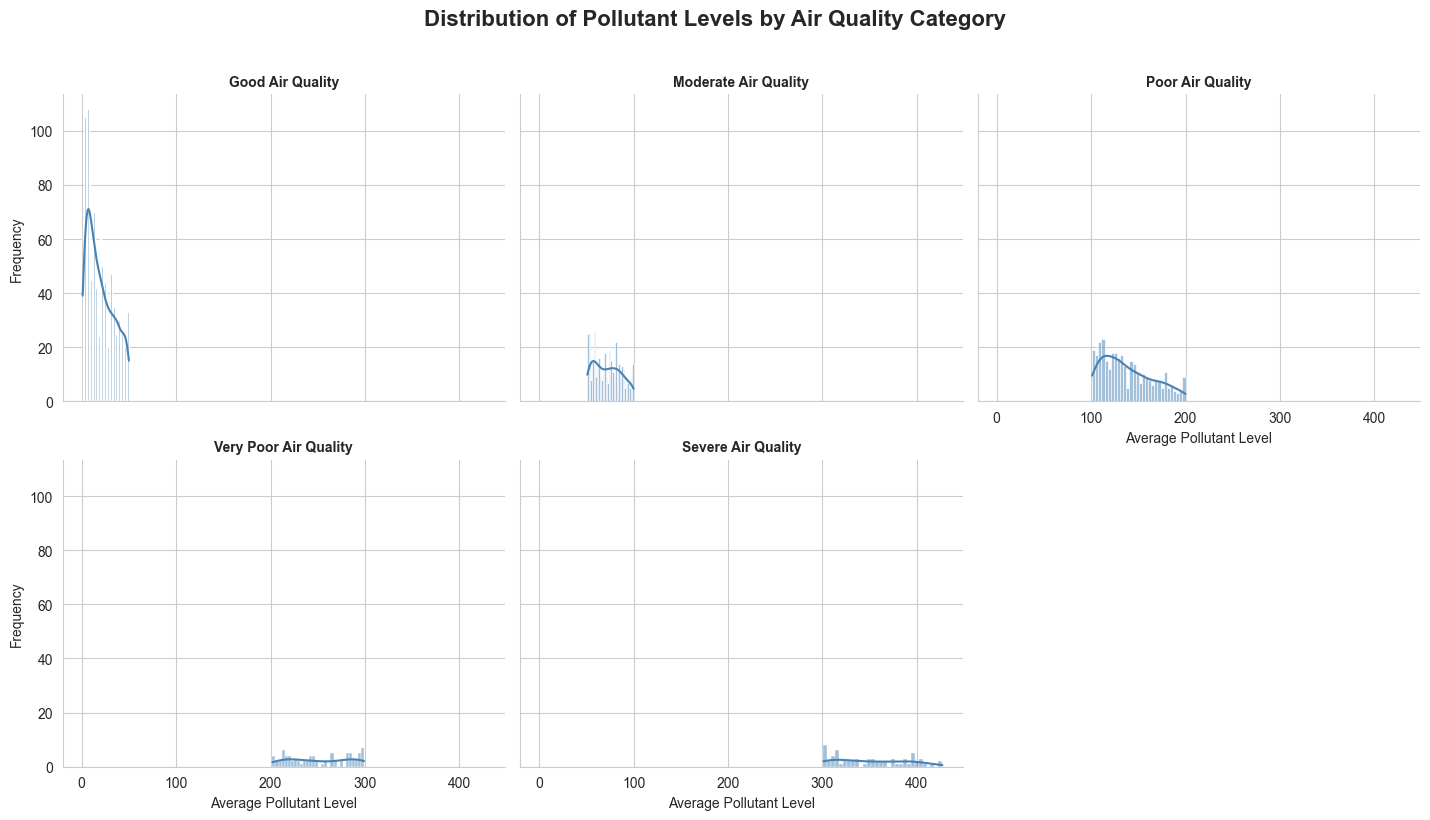

In [ ]:
# Visualization 13: Facet Grid - Pollutant Distribution across Pollution Levels
df_facet = df.dropna(subset=['pollution_level', 'pollutant_avg'])

# Sample for performance
if len(df_facet) > 3000:
    df_facet = df_facet.sample(3000, random_state=42)

g = sns.FacetGrid(df_facet, col='pollution_level', col_wrap=3, height=4, aspect=1.2)
g.map(sns.histplot, 'pollutant_avg', kde=True, bins=30, color='steelblue')
g.set_axis_labels('Average Pollutant Level', 'Frequency')
g.set_titles(col_template='{col_name} Air Quality', fontweight='bold', fontsize=12)
g.fig.suptitle('Distribution of Pollutant Levels by Air Quality Category',
               y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

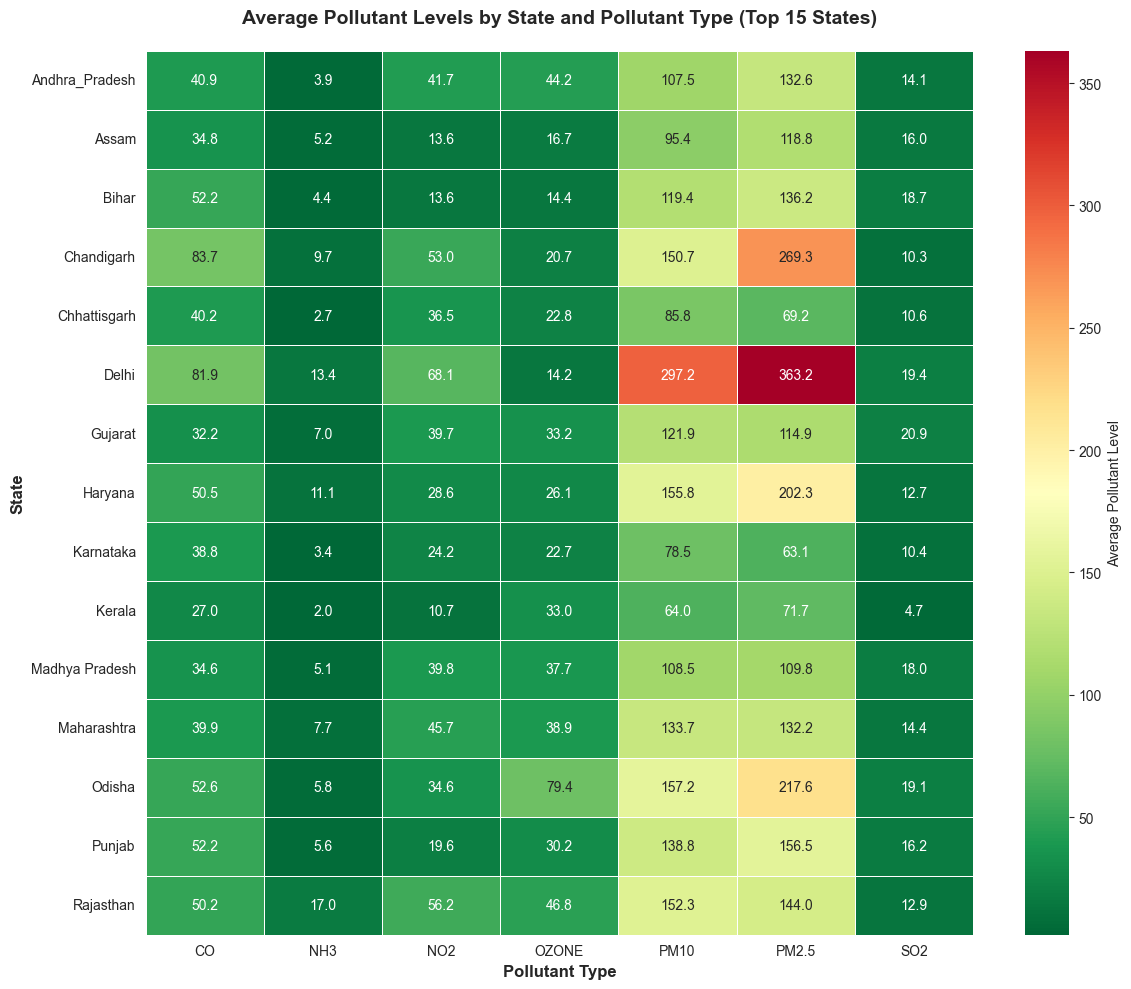

In [ ]:
# Visualization 14: Heatmap - Average Pollutant Levels by State and Pollutant Type
# Get top 15 states
top_states = df['state'].value_counts().head(15).index
df_states = df[df['state'].isin(top_states)]

state_pollutant_pivot = df_states.pivot_table(
    values='pollutant_avg',
    index='state',
    columns='pollutant_id',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(state_pollutant_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r',
            linewidths=0.5, cbar_kws={'label': 'Average Pollutant Level'},
            ax=ax)

ax.set_title('Average Pollutant Levels by State and Pollutant Type (Top 15 States)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Pollutant Type', fontsize=12, fontweight='bold')
ax.set_ylabel('State', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Visualization 15: Interactive Sunburst Chart - Hierarchical View (Plotly)
df_sunburst = df.dropna(subset=['pollutant_avg'])

# Get top states and cities for better visualization
top_states_sun = df_sunburst['state'].value_counts().head(8).index
df_sunburst = df_sunburst[df_sunburst['state'].isin(top_states_sun)]

sunburst_data = df_sunburst.groupby(['state', 'city', 'pollutant_id'])['pollutant_avg'].mean().reset_index()

fig = px.sunburst(sunburst_data,
                  path=['state', 'city', 'pollutant_id'],
                  values='pollutant_avg',
                  title='Hierarchical View: State → City → Pollutant Type',
                  height=700,
                  color='pollutant_avg',
                  color_continuous_scale='RdYlGn_r')

fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()

---
## KEY INSIGHTS SUMMARY

In [5]:
print("="*70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*70)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total Records: {len(df):,}")
print(f"   - Total States: {df['state'].nunique()}")
print(f"   - Total Cities: {df['city'].nunique()}")
print(f"   - Total Monitoring Stations: {df['station'].nunique()}")
print(f"   - Pollutant Types Monitored: {df['pollutant_id'].nunique()}")

print("\n2. POLLUTANT DISTRIBUTION:")
for pollutant, count in df['pollutant_id'].value_counts().head().items():
    print(f"   - {pollutant}: {count:,} readings")

print("\n3. POLLUTION LEVELS:")
for level, count in df['pollution_level'].value_counts().sort_index().items():
    percentage = (count / len(df)) * 100
    print(f"   - {level}: {count:,} readings ({percentage:.1f}%)")

print("\n4. TOP 5 MOST MONITORED STATES:")
for i, (state, count) in enumerate(df['state'].value_counts().head().items(), 1):
    print(f"   {i}. {state}: {count:,} readings")

print("\n5. STATISTICAL SUMMARY OF POLLUTANT LEVELS:")
df_stats = df['pollutant_avg'].describe()
print(f"   - Mean: {df_stats['mean']:.2f}")
print(f"   - Median (50%): {df_stats['50%']:.2f}")
print(f"   - Std Deviation: {df_stats['std']:.2f}")
print(f"   - Min: {df_stats['min']:.2f}")
print(f"   - Max: {df_stats['max']:.2f}")

print("\n6. CORRELATION INSIGHTS:")
corr_max_avg = df[['pollutant_max', 'pollutant_avg']].corr().iloc[0, 1]
corr_min_avg = df[['pollutant_min', 'pollutant_avg']].corr().iloc[0, 1]
print(f"   - Correlation (Max vs Avg): {corr_max_avg:.3f}")
print(f"   - Correlation (Min vs Avg): {corr_min_avg:.3f}")

print("\n" + "="*70)
print("END OF ANALYSIS")
print("="*70)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:


NameError: name 'df' is not defined